# Lab 08 - Unsupervised learning

(Adapted from [one of the 2019 ICFA tutorial notebooks](https://github.com/radiasoft/icfa_ml/blob/master/tutorials_2019/unsupervized_learning/unsupervised_learning.ipynb))

## Homework
- 8-1: K-means clustering comparison
- 8-2 B: DBSCAN algorithm 



# Environment

In [1]:
%reset -f

# This will import np, plt
%pylab --no-import-all inline

# For high DPI displays
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


# Introduction

As opposed to supervised learning, in unsupervised learning the goal is to infer a model which describes an unknown structure from unlabeled data. We'll consider two classes of unsupervised learning algorithms: clustering and anomaly detection.

We'll also see how unsupervised techniques can be used to reduce the dimensionality of the input feature set.

# 1. Clustering

Clustering is the task of grouping a set of items together in such a way that items in one group (a cluster) are more similar to each other than to those in other groups. There are several types of clustering algorithms: 

*   Hierarchical clustering (e.g. Linkage clustering)
*   Centroid-based clustering (e.g. k-means)
*   Distribution-based clustering (e.g. Expectation-Maximization)
*   Density-based clustering (e.g. DBSCAN)

We will look at one of the more simpler approaches: centroid-based clustering.


## K-Means Algorithm

Suppose we have a dataset {$x_1$, $x_2$, $x_3$, ..., $x_N$} consisting of $N$ observations of $D$ dimensional vectors **x** (i.e. $D$ features).

The goal is to partition the dataset into $K$ clusters. Therefore, the number of clusters in our dataset needs to be known a priori.

A cluster is a group of data points whose distances between one another in $D$-dimensional space are small compared to points outside the cluster.

This can be formalized by introducing a $D$-dimensional mean vector $\mu_k$, where $k = 1,2,3,...K$. This represents the center of the cluster.

The K-means clustering algorithm assigns a vector $x_{i,j}$ to the cluster which minimizes the following distortion measure: $J_k = ||x_{i,j} - \mu_k||^2$

The mean vector is then updated by computing the mean intensity value of the considered cluster such that

\begin{equation}
\mu_k = \frac{\sum\limits_i \sum\limits_j r_{i,j,k}x_{i,j}}{\sum\limits_i \sum\limits_j r_{i,j}}
\end{equation}

where

\begin{equation}
r_{i,j,k}=\begin{cases}
    1, & \text{if $k = \arg_k \min(||x_{i,j} - \mu_k||^2)$}\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

(see also Lecture 13.2 — Clustering | KMeans Algorithm — [ Machine Learning | Andrew Ng ] https://www.youtube.com/watch?v=hDmNF9JG3lo for more details)


## Dataset

Let's generate a two-dimensional dataset that we can easily visualize.

Note that the first 7 points are similar to each other (therefore they would belong to cluster 0) while the next 7 points are also similar to each other (they would belong to cluster 1)

In [2]:
# Generate a dataset
data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])

# Inspect the shape
data.shape

(14, 2)

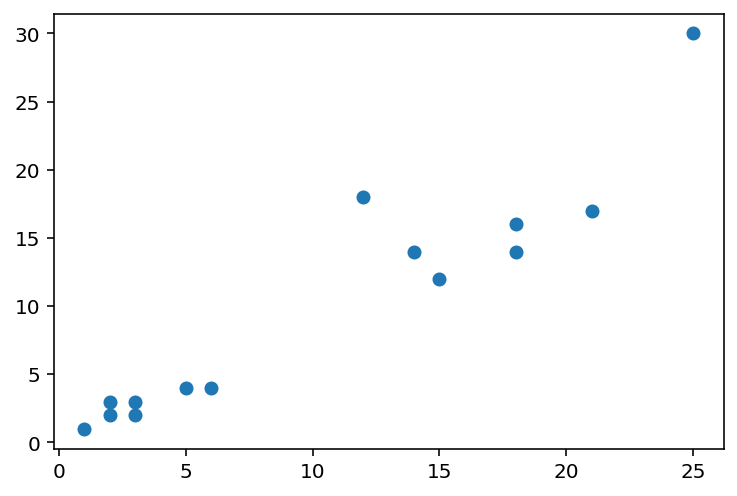

In [3]:
# Plot the data 
## YOUR CODE
plt.scatter(data[:,0], data[:,1])

## Clustering by distances

<div class="alert alert-block alert-info">
    
**Task** Complete the implementation of the functions `distance`, `predict_cluster` and `predict_clusters`, which are used within the k-means algorithm.
    
</div>

In [4]:
# Define a distance function as the Euclidean distance
def distance(pt1, pt2):
    
    ## YOUR CODE
    return np.sqrt(np.sum((pt1 - pt2)**2))

# Test
distance(data[0], data[1])

1.0

In [5]:
# Return a cluster index of a single data point, given a list of cluster centers
def predict_cluster(pt1, centers):
    
    ## YOUR CODE
    dist = [distance(pt1, mu) for mu in centers]
    
    ix = np.argmin(dist)
    
    return ix

# Test. This should return 0
predict_cluster(data[0], [ np.array([1,2]), np.array([20,20]) ] )

0

In [6]:
# Return a list of cluster indexes (cluster_labels)
def predict_clusters(data, centers):
    ## YOUR CODE
    return np.array([predict_cluster(pt, centers) for pt in data])
 
# Test. This should return an array of labels: array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
predict_clusters(data, [ np.array([1,2]), np.array([20, 20]) ] )

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

## Visualization

The code below assigns colors to each cluster: Cluster 0 will be blue, Cluster 1 will be red, etc.

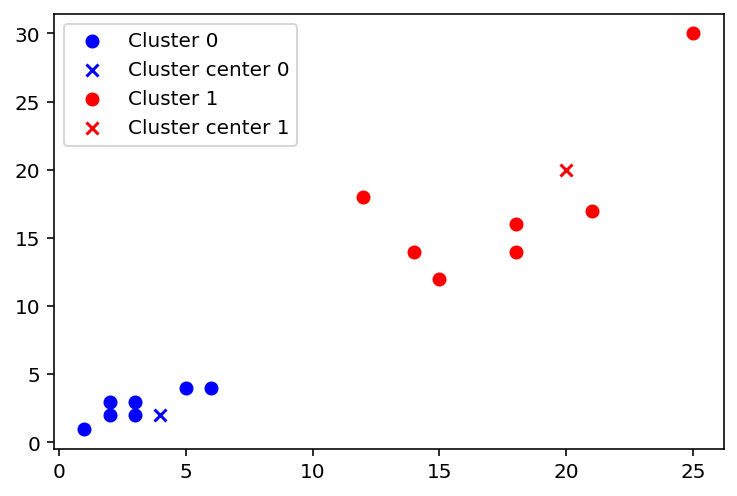

In [7]:
def plot_clusters(data, centers):
    
    # Get the cluster indices
    cluster_labels = predict_clusters(data, centers)
    
    fig, ax = plt.subplots()
    colors = ['blue', 'red', 'green', 'orange']   
    for ix, center in enumerate(centers):    
        cdata = data[cluster_labels == ix]
        ax.scatter(cdata[:,0], cdata[:,1], color=colors[ix], label=f'Cluster {ix}')
        ax.scatter(center[0], center[1], marker='x', color=colors[ix], label=f'Cluster center {ix}') 
    ax.legend()        
    
plot_clusters(data,  [ np.array([4,2]), np.array([20, 20]) ] )    

## Algorithm

<div class="alert alert-block alert-info">
    
**Task** 
    
Complete the implementation of the function below, which performs one iteration of k-means, i.e.:
    
- Finding the center for each data point
- Calculating the mean of the data points associated with each cluster.
    
</div>

In [8]:
# This will perform one iteration of the algorithm 
def calculate_new_centers(data, centers):
    """
    Args:
        data (array-like): points with shape (N points, D features)
        centers (list): initial cluster centers
    
    Returns:
        new_centers (list): new centers
    
    """
    
    ## YOUR CODE
    
    # List of indices
    cluster_labels = predict_clusters(data, centers)
    
    # Create new centers based on the means of the clusters
    new_centers = []
    for ix in range(len(centers)):
        cdata = data[cluster_labels == ix]
        mean = np.mean(cdata, axis=0)
        new_centers.append(mean)
            
    return new_centers

calculate_new_centers(data, data[2:4])

[array([2.        , 1.66666667]), array([12.63636364, 12.27272727])]

We'll iterate the algorithm 4 times

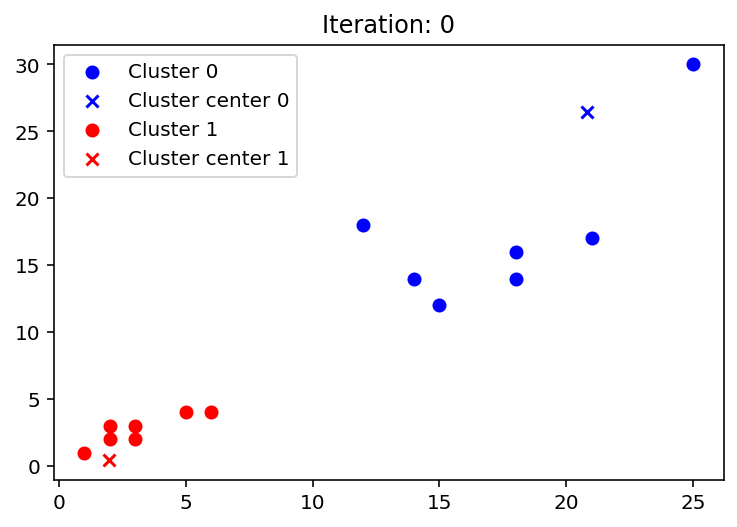

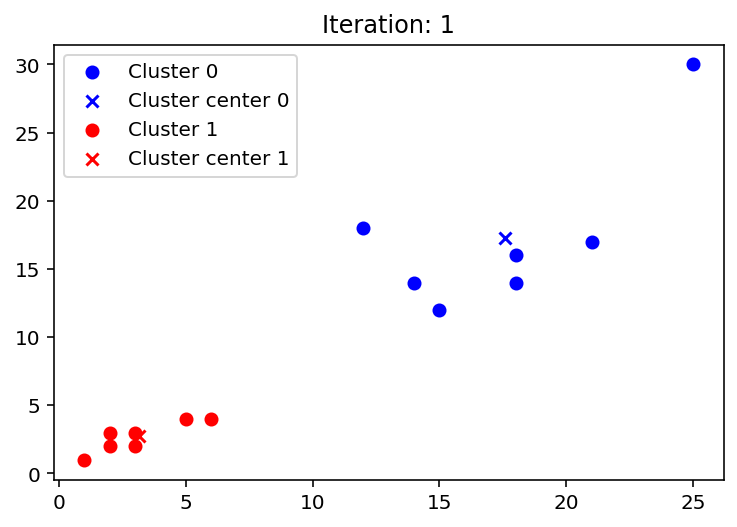

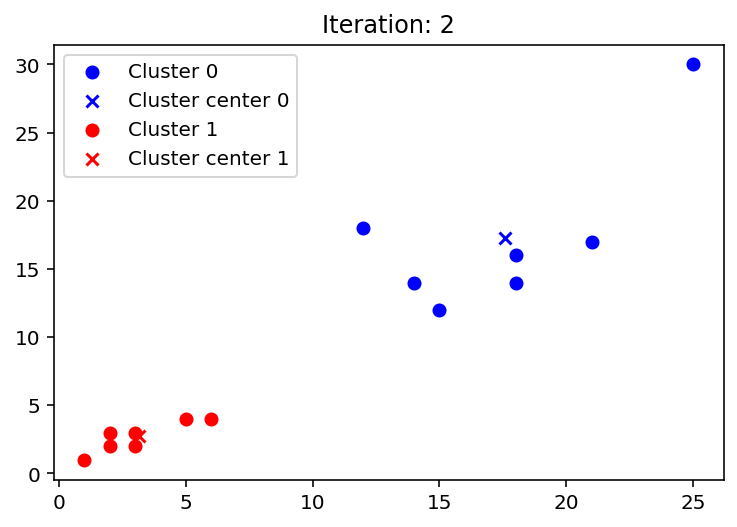

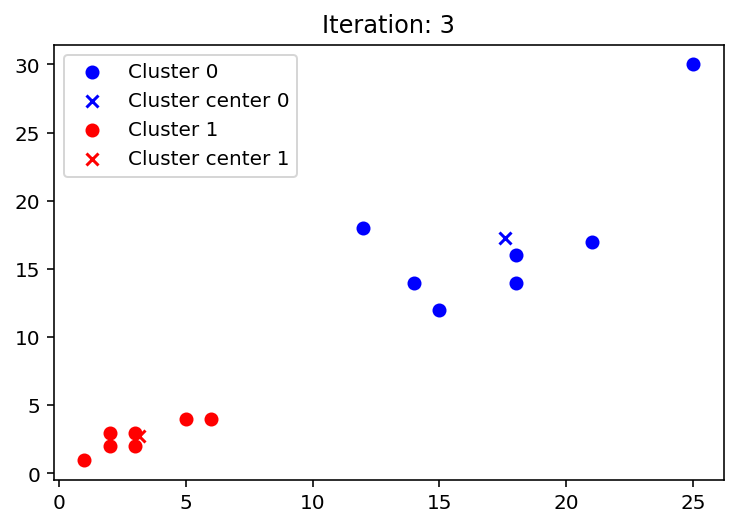

In [9]:
# Randomly initialize the means to some value (x1, x2) within our two-dimensional space
means0 = np.array([[np.random.random()*30,np.random.random()*30], [np.random.random()*30,np.random.random()*30]])

for it in range(4):
    # Plot the current solution
    plot_clusters(data, means0)
    plt.title(f'Iteration: {it}')    
    
    # Next solution
    means0 = calculate_new_centers(data, means0)

In [10]:
# Final result
means0

[array([17.57142857, 17.28571429]), array([3.14285714, 2.71428571])]

In [11]:
# Final cluster assignments
predict_clusters(data, means0)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

<div class="alert alert-block alert-info">
    
**Task** 
    
Repeat the above iterations a few times. What are potential problems with the algorithm?
    
</div>

## K-Means with sklearn

In practice we often use algorithms from well-developed packages. 

In [12]:
# We now import the KMeans module in sklearn
from sklearn.cluster import KMeans

In [13]:
# We can use a one-liner to fit our data using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [14]:
# The final means of each cluster
kmeans.cluster_centers_

array([[17.57142857, 17.28571429],
       [ 3.14285714,  2.71428571]])

In [15]:
# Label per data point indicating the final cluster it has been assigned to:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
# We can predict new values
kmeans.predict([[0, 0], [17, 15]] )

array([1, 0], dtype=int32)

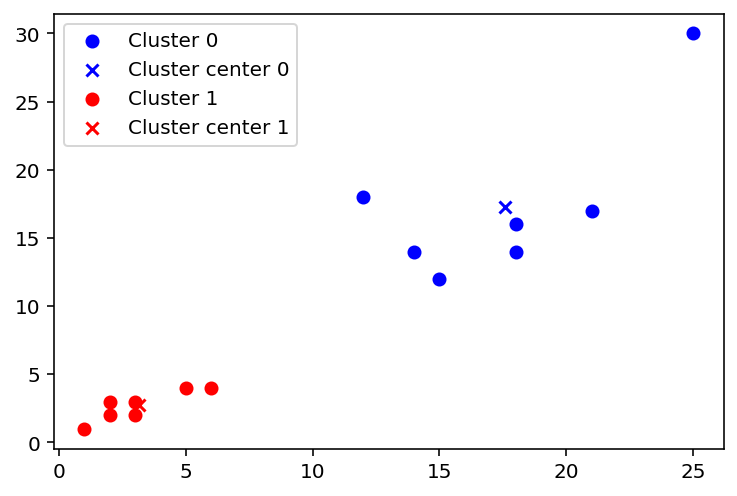

In [17]:
# Use the same plotting function as before
plot_clusters(data, kmeans.cluster_centers_)

<div class="alert alert-block alert-info">
    
**Task** 
    
Try K-means on a smoother dataset.
    
</div>

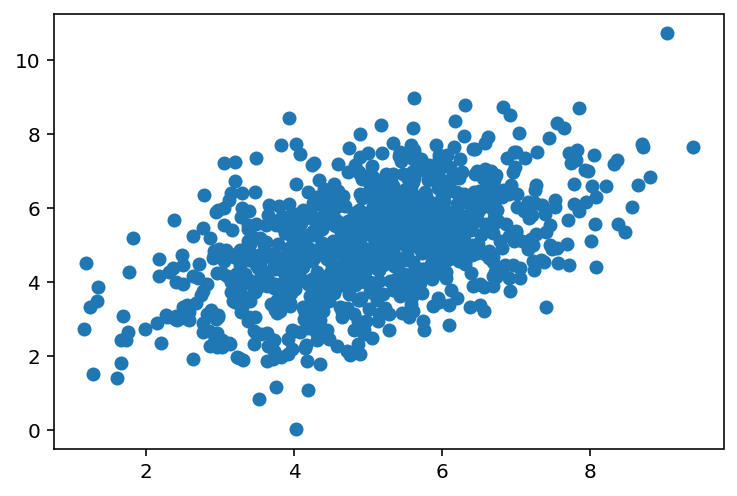

In [18]:
data2 = np.random.multivariate_normal([5, 5], np.array([[2, 1], [1,2]]), size=1000)
plt.scatter(data2[:,0], data2[:,1])

In [19]:
## YOUR CODE
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(data2)

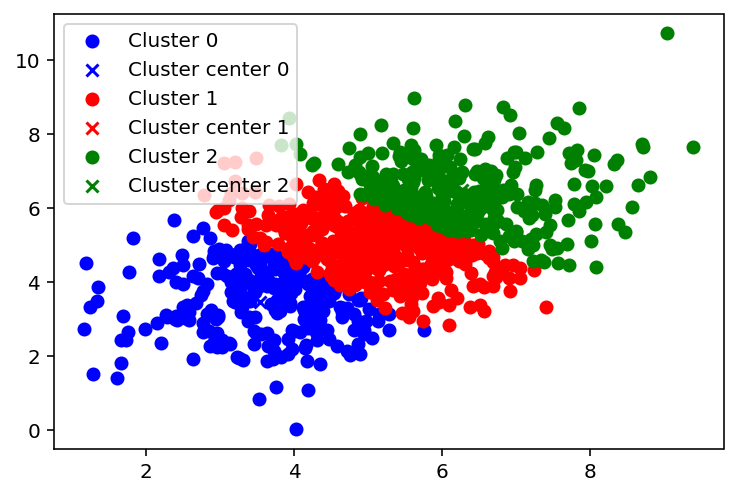

In [20]:
# Use the same plotting function as before
plot_clusters(data2, kmeans2.cluster_centers_)

# 2. Anomaly Detection

Anomaly detection is the identification of outliers, which do not resemble the bulk of the dataset. Several techniques are used in anomaly detection, including:



*   k Nearest Neighbours
*   DBSCAN
*   Isolation trees

## k Nearest Neighbours Distance

The k Nearest Neighbours distance anomaly detection algorithm assigns a score to each point in the dataset based on its distance from its kth nearest neighbour.

The larger the distance score, the more likely the point is an anomaly.

In [21]:
# Randomly generate points
data = np.random.randint(10, size=(15,2)) + 10

# Add outliers
data = np.vstack((data, np.array([5,5])))

# Inspect the shape
data.shape

(16, 2)

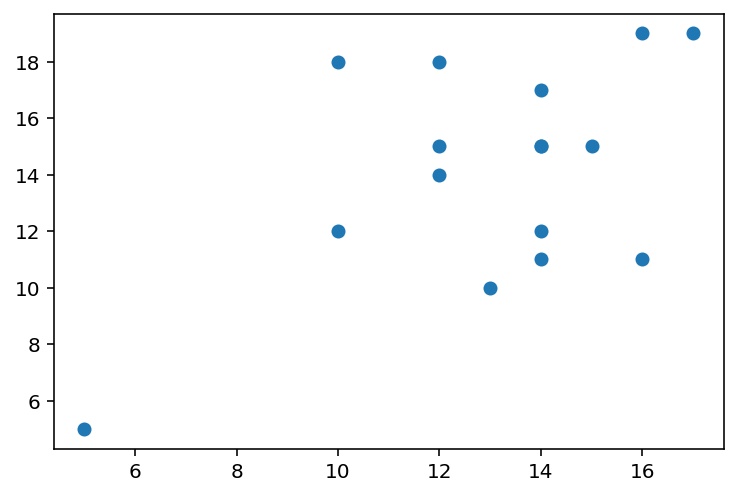

In [22]:
# Visualize the data
plt.scatter(data[:,0], data[:,1])

<div class="alert alert-block alert-info">
    
**Task** 
    
Complete the implementation of the function `compute_distances` below.
    
</div>

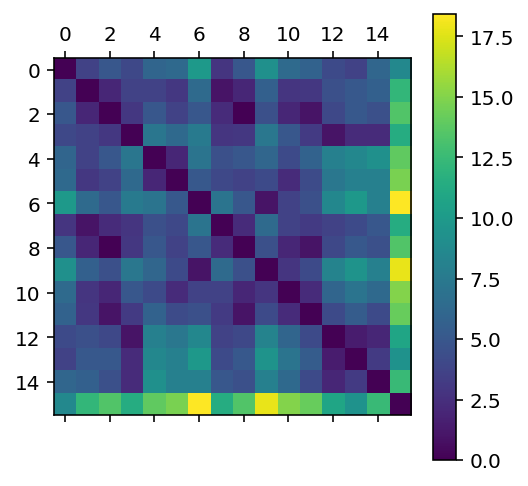

In [23]:
# Compute distances of each point wrt all other points

def compute_distances(data):
    """"
    Input: array of shape (N points, D features)
    Output: array of shape (N,N)
    """
    
    ## YOUR CODE
    return np.array([[distance(pt1, pt2) for pt1 in data] for pt2 in data])
  
distances = compute_distances(data)

#visalize the distances
plt.matshow(distances)
plt.colorbar()

In [24]:
# For each point, sort the distances and check which is the (k + 1)th nearest neighbour

def generate_knn_distances(k, distances):

    knn_distances = []

    for i in range(len(data)):

        sorted_distances = np.sort(distances[i,:])

        knn_distances.append(sorted_distances[k+1])

    return np.array(knn_distances)

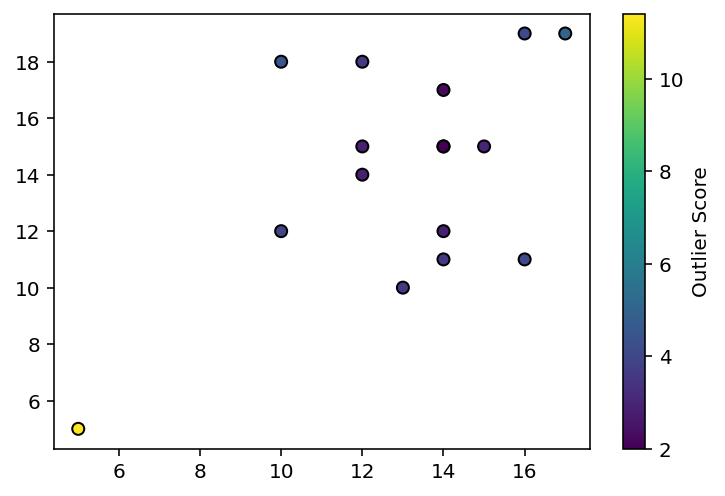

In [25]:
# Plot scatter plot with heat map

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

### Try on some other data

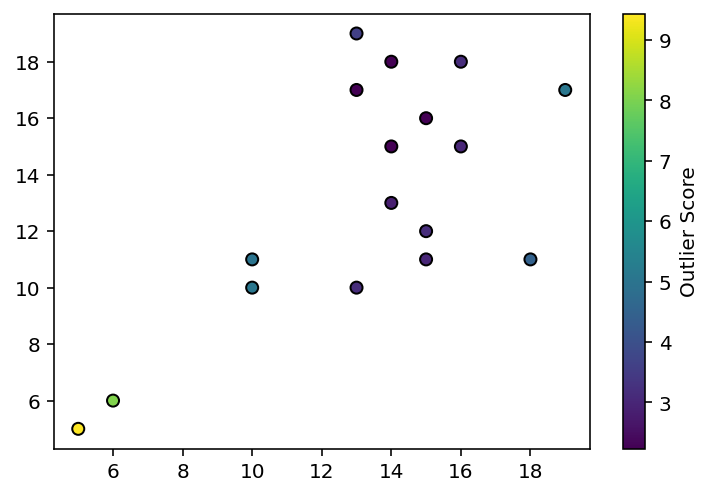

In [26]:
# Randomly generate points

data = np.random.randint(10, size=(15,2)) + 10

# Add outliers

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

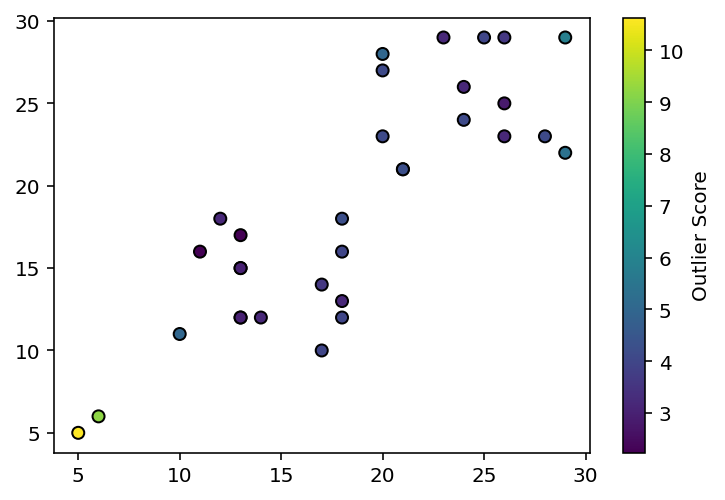

In [27]:
# Randomly generate points

data_1 = np.random.randint(10, size=(15,2)) + 10

data_2 = np.random.randint(10, size=(15,2)) + 20

# Add outliers

data = np.vstack((data_1, data_2))

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

# 3. Feature dimensionality reduction

Principal Components Analysis (PCA) is an unsupervised learning technique which reduces the dimensionality of the features.

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs

In [30]:
X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)

# Inspect the shape
X1.shape, Y1.shape

((100, 10), (100,))

In [31]:
# Check the labels
Y1

array([2, 1, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 0, 3, 2, 3, 2, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 1, 2,
       2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 3, 2, 3, 1, 2, 3, 2, 1, 3, 3, 0, 1,
       3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 1, 2, 0, 3, 2, 0, 1, 3, 1, 2])

In [32]:
# These are the unique ones
set(Y1)

{0, 1, 2, 3}

# Try to visualize
Visualizing this 10-dimensional space is difficult. Try various 2D and 3D projections

In [33]:
# Plot setup
from matplotlib import colors
cmap = plt.cm.rainbow
norm = colors.BoundaryNorm(np.arange(-.5, 4, 1), cmap.N)

<div class="alert alert-block alert-info">
    
**Task:**
   Try various projections: 0,1,2, or 3,6,9
    
</div>

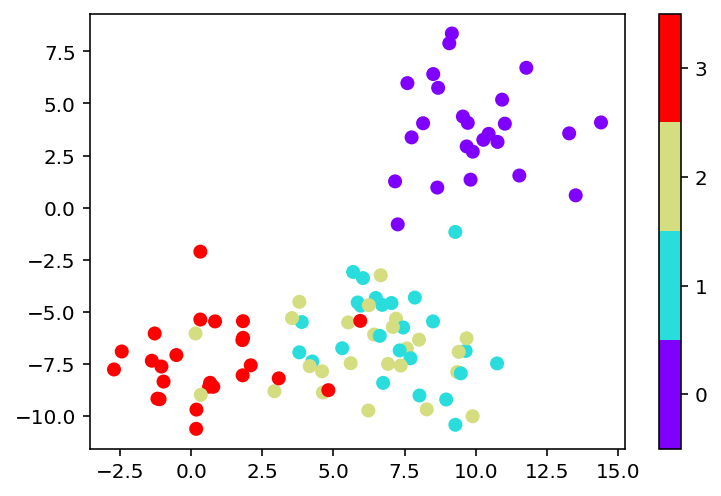

In [34]:
plt.scatter(X1[:,2], X1[:,4], c=Y1, cmap=cmap, norm=norm)
plt.colorbar(ticks=[0,1,2,3,4])

# PCA decomposition

Principal Component Analysis (see https://en.wikipedia.org/wiki/Principal_component_analysis) can be useful to project a high-dimensional space onto a lower dimensional space.

In [35]:
from sklearn import decomposition

In [36]:
# Get the documentation
# ?decomposition.PCA

In [37]:
pca = decomposition.PCA(n_components=4)

pc = pca.fit_transform(X1)

pc.shape

(100, 4)

In [38]:
# Organize the data with pandas

pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0
...,...,...,...,...,...
95,-4.734792,-15.677706,-4.013717,1.638843,0
96,14.474724,-1.170496,1.650520,-6.619600,1
97,-6.305432,13.098273,-3.843662,3.060215,3
98,22.169496,-3.863984,1.128840,-0.480688,1


In [39]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

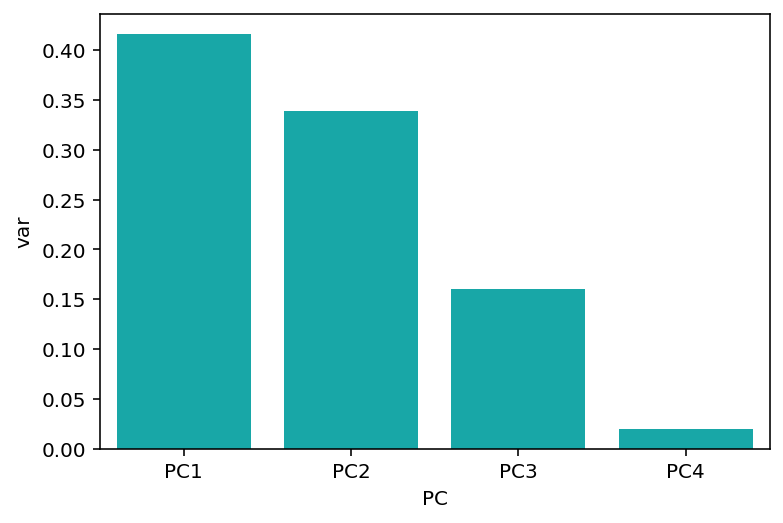

In [40]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

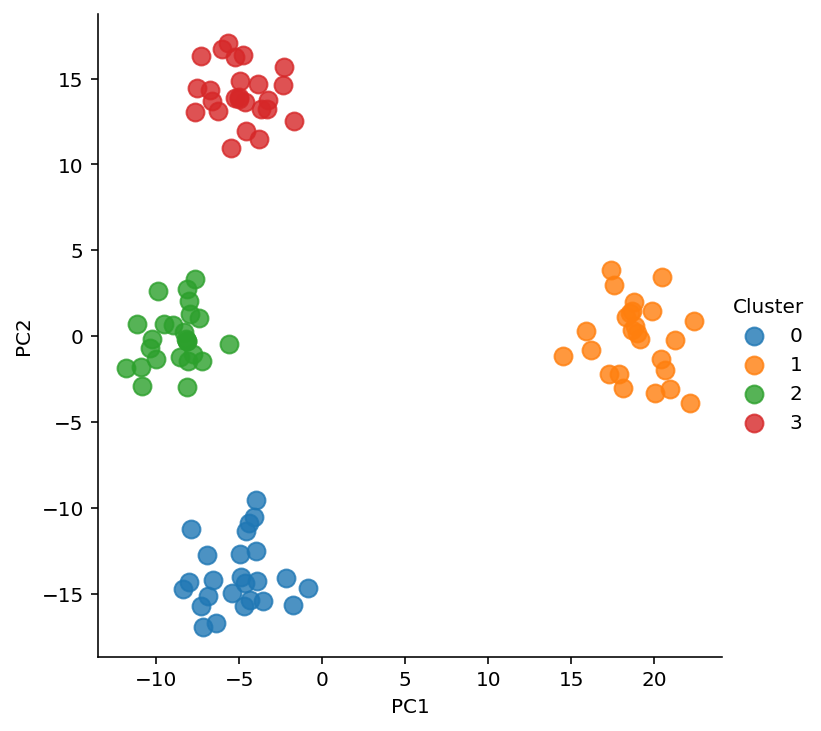

In [41]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

Text(0.5, 0, 'PC3')

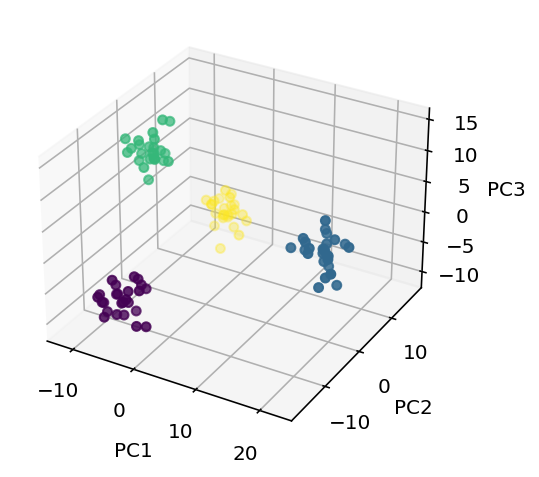

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['Cluster'])
#ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Homework

<div class="alert alert-block alert-success">
    
**Homework 8-1** 
    
Perform K-means clustering on both the original and the PCA-reduced blob dataset. Do you get the same results? 

Note: the specific cluster index assigned by K-means to a given cluster (e.g. `0` or `1` or `2`) may differ (even between repeated calls of k-means on the same dataset), but the value of these specific indices do not carry any meaning: the important point is whether K-means finds the same separate clusters. (Irrespective of how they are labeled.)
    
</div>

In [ ]:
## YOUR CODE

<div class="alert alert-block alert-success">
    
**Homework 8-2** 
    
In K-means, we need to know the number of clusters in advance. Try using the DBSCAN algorithm instead, once again on both the original and the PCA-reduced dataset, and see if you get the same results. 

(Note: DBSCAN requires the eps parameter to be set, i.e. the maximum distance between two samples for them to be considered as in the same neighborhood)
    
</div>

In [ ]:
## YOUR CODE